# Time series and spectra from moorings and model


In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

SMALL_SIZE = 7
MEDIUM_SIZE = 8
BIGGER_SIZE = 10

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

Load required data.

In [2]:
AS = xr.open_dataset("../data/ABLE_sentinel_mooring_2018.nc")
DD = xr.open_dataset("../data/downstream_deep_mooring_2018.nc")

DDles = xr.open_dataset("../data/downstream_deep_time_series.nc")
ASles = xr.open_dataset("../data/able_sentinel_time_series.nc")

Some more quality control - time when the deep mooring was stationary.

# MN & LES w

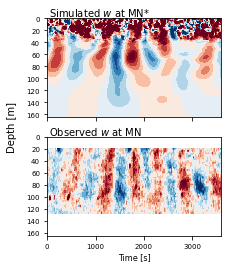

In [3]:
# Time range
time1 = np.datetime64("2018-09-03T07:00")
tslice = slice(time1, time1 + np.timedelta64(3600, 's'))

AS_ = AS.sel(time=tslice)
ASles_ = ASles.sel(time=slice(ASles.time.max().values - (tslice.stop - tslice.start).astype("timedelta64[s]").astype(int), None))

time_AS = AS_.time.values.astype("datetime64[s]") - AS_.time.values.astype("datetime64[s]")[0]
time_les = ASles_.time - ASles_.time[0]

kwargs = {"cmap":"RdBu_r", "extend":"both"}
levs = np.linspace(-0.05, 0.05, 11)

fig, axs = plt.subplots(2, 1, sharex="col", sharey="row", figsize=(3.125, 4)) 

axs[0].contourf(time_les, ASles_.zw, ASles_.w_y.T, levs, **kwargs)
CF = axs[1].contourf(time_AS, AS_.depth, AS_.vv.T, levs, **kwargs)

for ax, name in zip(axs, ["Simulated $w$ at MN*", "Observed $w$ at MN"]):
    ax.annotate(name, (0.01, 1.02), xycoords="axes fraction")
    ax.set_yticks(np.arange(0, 200, 20))

axs[0].set_ylim(165, 0)
axs[1].set_ylim(165, 0)

bbox0 = axs[0].get_position()
bbox1 = axs[1].get_position()
fig.text(-0.03, 0.5*(bbox0.y0 + bbox1.y1), "Depth [m]", ha="center", va="center", rotation=90)

axs[-1].set_xlabel("Time [s]")
axs[-1].set_xticks(np.linspace(0, 3000, 4))


fig.savefig("../figures/MN_LES_w_timeseries.pdf", dpi=300, bbox_inches="tight", pad_inches=0)
fig.savefig("../figures/MN_LES_w_timeseries.png", dpi=300, bbox_inches="tight", pad_inches=0)

# MN & MD w and u

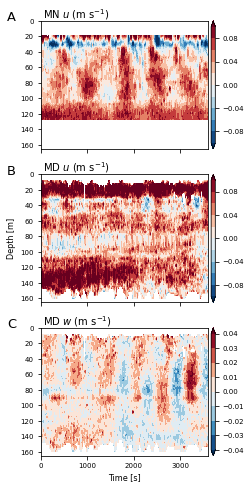

In [4]:
time1 = np.datetime64("2018-09-03T07:00")
tslice = slice(time1, time1 + np.timedelta64(3600, 's'))

AS_ = AS.sel(time=tslice)
DD_ = DD.sel(time=tslice)

time_AS = AS_.time.values.astype("datetime64[s]") - AS_.time.values.astype("datetime64[s]")[0]
time_DD = DD_.time.values.astype("datetime64[s]") - DD_.time.values.astype("datetime64[s]")[0]

kwargs = {"cmap":"RdBu_r", "extend":"both"}

fig, axs = plt.subplots(3, 2, sharex="col", figsize=(3.125, 8), gridspec_kw=dict(width_ratios=[40, 1], wspace=0.04))
caxs = axs[:, 1]
axs = axs[:, 0]
axs[1].set_ylabel("Depth [m]")
axs[-1].set_xlabel("Time [s]")
axs[-1].set_xticks(np.linspace(0, 3000, 4))



for ax, name in zip(axs, ["MN $u$ (m s$^{-1}$)", "MD $u$ (m s$^{-1}$)", "MD $w$ (m s$^{-1}$)"]):
    ax.annotate(name, (0.01, 1.02), xycoords="axes fraction")
    ax.set_yticks(np.arange(0, 200, 20))
    ax.set_ylim(165, 0)

levs = np.linspace(-0.1, 0.1, 11)
CF0 = axs[0].contourf(time_AS, AS_.depth, AS_.u.T, levs, **kwargs)
cb0 = plt.colorbar(CF0, cax=caxs[0])
CF1 = axs[1].contourf(time_DD, DD_.depth_adcp, DD_.u.T, levs, **kwargs)
cb1 = plt.colorbar(CF1, cax=caxs[1])
levs = np.linspace(-0.04, 0.04, 9)
CF2 = axs[2].contourf(time_DD, DD_.depth_adcp, DD_.w.T, levs, **kwargs)
cb2 = plt.colorbar(CF2, cax=caxs[2])

for ax, char in zip(axs, "ABC"):
    pos = ax.get_position()
    fig.text(pos.x0 - 0.15, pos.y1, char, fontsize="13")

fig.savefig("../figures/MN_MD_u_w_timeseries.pdf", dpi=300, bbox_inches="tight", pad_inches=0)
fig.savefig("../figures/MN_MD_u_w_timeseries.png", dpi=300, bbox_inches="tight", pad_inches=0)

# MD & LES w

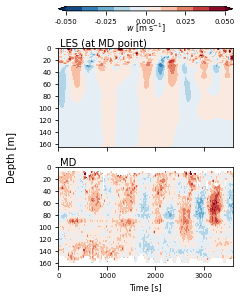

In [5]:
DD_ = DD.sel(time=tslice)
DDles_ = DDles.sel(time=slice(DDles.time.max().values - (tslice.stop - tslice.start).astype("timedelta64[s]").astype(int), None))

time_DD = DD_.time.values.astype("datetime64[s]") - DD_.time.values.astype("datetime64[s]")[0]
time_les = DDles_.time - DDles_.time[0]

kwargs = {"cmap":"RdBu_r", "extend":"both"}
levs = np.linspace(-0.05, 0.05, 11)

fig, axs = plt.subplots(2, 1, sharex="col", sharey="row", figsize=(3.125, 4)) 

axs[0].contourf(time_les, DDles_.zw, DDles_.w_y.T, levs, **kwargs)
CF = axs[1].contourf(time_DD, DD_.depth_adcp, DD_.w.T, levs, **kwargs)

for ax, name in zip(axs, ["LES (at MD point)", "MD"]):
    ax.annotate(name, (0.01, 1.02), xycoords="axes fraction")
    ax.set_yticks(np.arange(0, 200, 20))

axs[0].set_ylim(165, 0)
axs[1].set_ylim(165, 0)

bbox0 = axs[0].get_position()
bbox1 = axs[1].get_position()
fig.text(-0.08, 0.5*(bbox0.y0 + bbox1.y1), "Depth [m]", ha="center", va="center", rotation=90)

axs[-1].set_xlabel("Time [s]")
axs[-1].set_xticks(np.linspace(0, 3000, 4))

cb = plt.colorbar(CF, cax=fig.add_axes((bbox0.x0, 1.01, bbox0.width, 0.015)), orientation="horizontal")
cb.set_label("$w$ [m s$^{-1}$]", labelpad=-3)
ticks = (levs[0], levs[0]/2, 0, levs[-1]/2, levs[-1])
cb.set_ticks(ticks)
cb.set_ticklabels(["{:1.3f}".format(tick) for tick in ticks])

fig.savefig("../figures/MD_LES_w.pdf", dpi=300, bbox_inches="tight", pad_inches=0)
fig.savefig("../figures/MD_LES_w.png", dpi=300, bbox_inches="tight", pad_inches=0)

# Frequency content

In [6]:
from scipy.signal import spectrogram
from scipy import stats

/var/folders/qm/pnvvmx2d5gd97cbng1gmddzw0000gn/T/ipykernel_13376/344474140.py:93: RuntimeWarning: divide by zero encountered in true_divide
  secax = ax.secondary_xaxis('top', functions=(lambda x: 1440/x, lambda x: 1440/x))
/var/folders/qm/pnvvmx2d5gd97cbng1gmddzw0000gn/T/ipykernel_13376/344474140.py:93: RuntimeWarning: divide by zero encountered in true_divide
  secax = ax.secondary_xaxis('top', functions=(lambda x: 1440/x, lambda x: 1440/x))


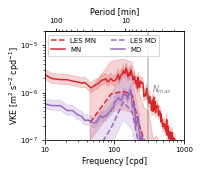

In [7]:
# PARAMETERS
tslice = slice(3600, None)  # Time slice from simulation, 1800 s and onwards
conf = 0.95  # Error bar limits
dmin = 30.  # Depth min, max to average over
dmax = 60.
# Spectral parameters
nperseg = 2**11  # 2**9 is about 1.5 hours for a time step of 10 seconds
nperseg_les = 2**6
window = "hann"
scaling = "density"
max_gap = np.timedelta64(180, 's') # For interpolating NaN gaps

# PREP DATA
alpha = 1 - conf
fs = 86400./(DD.time[1] - DD.time[0]).data.astype("timedelta64[s]").astype(float) # in cpd
fs_les = 86400./30.  # Only true after the first 1800 seconds!! Before that it is 60 s time step.

# Extract the right time and depth slice of LES
DDles_ = DDles.sel(time=tslice).sel(zu=slice(dmax, dmin))
ASles_ = ASles.sel(time=tslice).sel(zu=slice(dmax, dmin))

# Extract the right depth slice of mooring data
DD_ = DD.sel(depth_adcp=slice(dmin, dmax))
use = (AS.depth > dmin) & (AS.depth < dmax)
AS_ = AS.isel(distance=use)

# ESTIMATE THE SPECTRA
# _, _, Suu = spectrogram(DD_.u.interpolate_na(dim="time", max_gap=max_gap), fs, window, nperseg, scaling=scaling, axis=0)
# _, _, Svv = spectrogram(DD_.v.interpolate_na(dim="time", max_gap=max_gap), fs, window, nperseg, scaling=scaling, axis=0)
freqs, time, Sww = spectrogram(DD_.w.interpolate_na(dim="time", max_gap=max_gap), fs, window, nperseg, scaling=scaling, axis=0)
SKE_DD = 0.5*Sww # 0.5*(Suu + Svv + Sww)
KE_DD = np.nanmean(np.nanmean(SKE_DD, axis=2), axis=1)  # Average first over time then over depth
EDOF = time.size - 1

cl_DD = 2*EDOF / stats.chi2.ppf(conf + alpha / 2, 2*EDOF)
cu_DD = 2*EDOF / stats.chi2.ppf(alpha / 2, 2*EDOF)

# _, _, Suu = spectrogram(DDles_.u, fs_les, window, nperseg=nperseg_les, scaling=scaling, axis=0)
# _, _, Svv = spectrogram(DDles_.v, fs_les, window, nperseg=nperseg_les, scaling=scaling, axis=0)
freqs_les, time, Sww = spectrogram(DDles_.w, fs_les, window, nperseg=nperseg_les, scaling=scaling, axis=0)
SKEles = 0.5*Sww #0.5*(Suu + Svv + Sww)
KE_DD_les = np.nanmean(np.nanmean(SKEles, axis=2), axis=1)  # Average first over time then over depth
EDOF_les = time.size - 1

cl_les = 2*EDOF_les / stats.chi2.ppf(conf + alpha / 2, 2*EDOF_les)
cu_les = 2*EDOF_les / stats.chi2.ppf(alpha / 2, 2*EDOF_les)

# _, _, Suu = spectrogram(AS_.u.interpolate_na(dim="time", max_gap=max_gap), fs, window, nperseg, scaling=scaling, axis=0)
# _, _, Svv = spectrogram(AS_.v.interpolate_na(dim="time", max_gap=max_gap), fs, window, nperseg, scaling=scaling, axis=0)
freqs, time, Sww = spectrogram(AS_.vv.interpolate_na(dim="time", max_gap=max_gap), fs, window, nperseg, scaling=scaling, axis=0)
SKE_AS = 0.5*Sww # 0.5*(Suu + Svv + Sww)
KE_AS = np.nanmean(np.nanmean(SKE_AS, axis=2), axis=1)  # Average first over time then over depth
EDOF = time.size - 1

# KE_AS_depth_average = np.nanmean(SKE_AS, axis=1)  # Depth average
# EDOF = np.isfinite(KE_AS_depth_average).all(axis=0).sum() - 1
# KE_AS = np.nanmean(KE_AS_depth_average, axis=-1)  # Time average

cl_AS = 2*EDOF / stats.chi2.ppf(conf + alpha / 2, 2*EDOF)
cu_AS = 2*EDOF / stats.chi2.ppf(alpha / 2, 2*EDOF)

# _, _, Suu = spectrogram(ASles_.u, fs_les, window, nperseg=nperseg_les, scaling=scaling, axis=0)
# _, _, Svv = spectrogram(ASles_.v, fs_les, window, nperseg=nperseg_les, scaling=scaling, axis=0)
freqs_les, time, Sww = spectrogram(ASles_.w, fs_les, window, nperseg=nperseg_les, scaling=scaling, axis=0)
SKEles = 0.5*Sww #0.5*(Suu + Svv + Sww)
KE_AS_les = np.nanmean(np.nanmean(SKEles, axis=2), axis=1)  # Average first over time then over depth

# MAKE PLOT
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(2.5, 2))

ax.loglog(freqs_les[1:], KE_AS_les[1:], "C3--", label="LES MN")
ax.fill_between(freqs_les[1:], cl_les*KE_AS_les[1:], cu_les*KE_AS_les[1:], color="C3", alpha=0.2)

ax.loglog(freqs[1:], KE_AS[1:], "C3", label="MN")
ax.fill_between(freqs[1:], cl_AS*KE_AS[1:], cu_AS*KE_AS[1:], color="C3", alpha=0.2)

ax.loglog(freqs_les[1:], KE_DD_les[1:], "C4--", label="LES MD")
ax.fill_between(freqs_les[1:], cl_les*KE_DD_les[1:], cu_les*KE_DD_les[1:], color="C4", alpha=0.2)

ax.loglog(freqs[1:], KE_DD[1:], "C4", label="MD")
ax.fill_between(freqs[1:], cl_DD*KE_DD[1:], cu_DD*KE_DD[1:], color="C4", alpha=0.2)

ax.set_xlim(1e1, 1e3)
ax.set_ylim(1e-7, 2e-5)

ax.set_xticks([10, 100, 1000])
ax.set_xticklabels(["10", "100", "1000"])

ax.set_xlabel("Frequency [cpd]")
ax.legend(loc="upper left", ncol=2)
ax.set_ylabel("VKE [m$^2$ s$^{-2}$ cpd$^{-1}$]", labelpad=-2)

secax = ax.secondary_xaxis('top', functions=(lambda x: 1440/x, lambda x: 1440/x))
secax.set_xlabel('Period [min]')
secax.set_xticks([100, 10])
secax.set_xticklabels(["100", "10"])

ax.axvline(300, color="gray", alpha=0.5)
ax.annotate("$N_{max}$", (350, 1e-6), color="gray", fontsize=8)
    
fig.savefig("../figures/spectra.pdf", dpi=300, bbox_inches="tight", pad_inches=0)
fig.savefig("../figures/spectra.png", dpi=300, bbox_inches="tight", pad_inches=0)